if needed, uncomment the following line and install the `nltk` library if it's not already installed on your system!

You need the link to the plain text version of the Project Gutenberg book you want to download. In this example, we are downloading Oscar Wilde's "The Importance of Being Earnest" and the link corresponding to it is https://www.gutenberg.org/cache/epub/844/pg844.txt . Replace this link in the code by the link for your own book.

In [23]:
#pip install nltk

Loading the required libraries. On Google Colab, replace the line `nltk.download()` by `nltk.download('all')`

In [2]:
import requests
import pandas as pd
import re
import nltk
nltk.download() #replace this line by `nltk.download('all')` on Google Colab
from nltk.stem import WordNetLemmatizer
from nltk.collocations import BigramCollocationFinder
from nltk.sentiment import SentimentIntensityAnalyzer
import sys
import time
# import needed packages
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [3]:
r = requests.get(r'https://www.gutenberg.org/cache/epub/844/pg844.txt') #getting the text from the corresponding URL

In [54]:
if r.status_code==200:
    text = r.text

In [55]:
text

'\ufeffThe Project Gutenberg eBook of The Importance of Being Earnest: A Trivial Comedy for Serious People\r\n    \r\nThis ebook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this ebook or online\r\nat www.gutenberg.org. If you are not located in the United States,\r\nyou will have to check the laws of the country where you are located\r\nbefore using this eBook.\r\n\r\nTitle: The Importance of Being Earnest: A Trivial Comedy for Serious People\r\n\r\nAuthor: Oscar Wilde\r\n\r\nRelease date: March 1, 1997 [eBook #844]\r\n                Most recently updated: February 13, 2021\r\n\r\nLanguage: English\r\n\r\nCredits: David Price\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE IMPORTANCE OF BEING EARNEST: A TRIVIAL COMEDY FOR SERIOUS PEOPLE ***\r\n\r\n\r\n\r\n\r\nThe Im

In [56]:
len(text)

141003

In [57]:
print(text[0:2500])
#print("\n",len(text))

The Project Gutenberg eBook of The Importance of Being Earnest: A Trivial Comedy for Serious People
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: The Importance of Being Earnest: A Trivial Comedy for Serious People

Author: Oscar Wilde

Release date: March 1, 1997 [eBook #844]
                Most recently updated: February 13, 2021

Language: English

Credits: David Price


*** START OF THE PROJECT GUTENBERG EBOOK THE IMPORTANCE OF BEING EARNEST: A TRIVIAL COMEDY FOR SERIOUS PEOPLE ***




The Importance of Being Earnest

A Trivial Comedy for Serious People

THE PERSONS IN THE PLAY


In [58]:
print(text[122115:122200])


*** END OF THE PROJECT GUTENBERG EBOOK THE IMPORTANCE OF BEING EARNEST: A TRIVIAL C


In [59]:
reg = re.compile(
    r"\*\*\* START OF THE PROJECT GUTENBERG EBOOK .*?\*\*\*(.*?)\*\*\* END OF THE PROJECT GUTENBERG EBOOK .*?\*\*\*",
    re.DOTALL
)

In [60]:
match = re.search(reg, text)
if match:
    extracted_text = match.group(1).strip()  # Extract and strip any leading/trailing whitespace
    print("Extracted text:")
    print(extracted_text)
else:
    print("No match found. Ensure the start and end markers are correct.")

Extracted text:
The Importance of Being Earnest

A Trivial Comedy for Serious People

THE PERSONS IN THE PLAY

John Worthing, J.P.
Algernon Moncrieff
Rev. Canon Chasuble, D.D.
Merriman, Butler
Lane, Manservant
Lady Bracknell
Hon. Gwendolen Fairfax
Cecily Cardew
Miss Prism, Governess

THE SCENES OF THE PLAY

ACT I. Algernon Moncrieff’s Flat in Half-Moon Street, W.

ACT II. The Garden at the Manor House, Woolton.

ACT III. Drawing-Room at the Manor House, Woolton.

TIME: The Present.

LONDON: ST. JAMES’S THEATRE

Lessee and Manager: Mr. George Alexander

February 14th, 1895

* * * * *

John Worthing, J.P.: Mr. George Alexander.
Algernon Moncrieff: Mr. Allen Aynesworth.
Rev. Canon Chasuble, D.D.: Mr. H. H. Vincent.
Merriman: Mr. Frank Dyall.
Lane: Mr. F. Kinsey Peile.
Lady Bracknell: Miss Rose Leclercq.
Hon. Gwendolen Fairfax: Miss Irene Vanbrugh.
Cecily Cardew: Miss Evelyn Millard.
Miss Prism: Mrs. George Canninge.




FIRST ACT


SCENE

Morning-room in Algernon’s flat in Half-Moon Stree

In [61]:
extracted_text

'The Importance of Being Earnest\r\n\r\nA Trivial Comedy for Serious People\r\n\r\nTHE PERSONS IN THE PLAY\r\n\r\nJohn Worthing, J.P.\r\nAlgernon Moncrieff\r\nRev. Canon Chasuble, D.D.\r\nMerriman, Butler\r\nLane, Manservant\r\nLady Bracknell\r\nHon. Gwendolen Fairfax\r\nCecily Cardew\r\nMiss Prism, Governess\r\n\r\nTHE SCENES OF THE PLAY\r\n\r\nACT I. Algernon Moncrieff’s Flat in Half-Moon Street, W.\r\n\r\nACT II. The Garden at the Manor House, Woolton.\r\n\r\nACT III. Drawing-Room at the Manor House, Woolton.\r\n\r\nTIME: The Present.\r\n\r\nLONDON: ST. JAMES’S THEATRE\r\n\r\nLessee and Manager: Mr. George Alexander\r\n\r\nFebruary 14th, 1895\r\n\r\n* * * * *\r\n\r\nJohn Worthing, J.P.: Mr. George Alexander.\r\nAlgernon Moncrieff: Mr. Allen Aynesworth.\r\nRev. Canon Chasuble, D.D.: Mr. H. H. Vincent.\r\nMerriman: Mr. Frank Dyall.\r\nLane: Mr. F. Kinsey Peile.\r\nLady Bracknell: Miss Rose Leclercq.\r\nHon. Gwendolen Fairfax: Miss Irene Vanbrugh.\r\nCecily Cardew: Miss Evelyn Millard.

In [62]:
lines = extracted_text.splitlines()
non_empty_lines = [ l for l in lines if l!="" ]
print("Difference total lines and non empty lines: ", len(lines)-len(non_empty_lines))
print("Total number of lines: ", len(lines))
print("Total number of non-empty lines: ", len(non_empty_lines))


Difference total lines and non empty lines:  966
Total number of lines:  3884
Total number of non-empty lines:  2918


In [68]:
for char in ["\n", "\r", "\d", "\t"]:
    play = extracted_text.replace(char, " ")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/5s/2df7vjxs371f0f47gzlnsjg40000gp/T/ipykernel_72079/3807711513.py:1: SyntaxWarning: invalid escape sequence '\d'
  for char in ["\n", "\r", "\d", "\t"]:


In [69]:
print(play)

The Importance of Being Earnest

A Trivial Comedy for Serious People

THE PERSONS IN THE PLAY

John Worthing, J.P.
Algernon Moncrieff
Rev. Canon Chasuble, D.D.
Merriman, Butler
Lane, Manservant
Lady Bracknell
Hon. Gwendolen Fairfax
Cecily Cardew
Miss Prism, Governess

THE SCENES OF THE PLAY

ACT I. Algernon Moncrieff’s Flat in Half-Moon Street, W.

ACT II. The Garden at the Manor House, Woolton.

ACT III. Drawing-Room at the Manor House, Woolton.

TIME: The Present.

LONDON: ST. JAMES’S THEATRE

Lessee and Manager: Mr. George Alexander

February 14th, 1895

* * * * *

John Worthing, J.P.: Mr. George Alexander.
Algernon Moncrieff: Mr. Allen Aynesworth.
Rev. Canon Chasuble, D.D.: Mr. H. H. Vincent.
Merriman: Mr. Frank Dyall.
Lane: Mr. F. Kinsey Peile.
Lady Bracknell: Miss Rose Leclercq.
Hon. Gwendolen Fairfax: Miss Irene Vanbrugh.
Cecily Cardew: Miss Evelyn Millard.
Miss Prism: Mrs. George Canninge.




FIRST ACT


SCENE

Morning-room in Algernon’s flat in Half-Moon Street. The room is
l

In [70]:
print(f"the type of your data: {type(play)}")

the type of your data: <class 'str'>


In [71]:
print(f"length = {len(play)} characters")

length = 121169 characters


In [72]:
reference_dict = {}
characters = ["algernon","mr. moncrieff", "algernon moncrieff","gwendolen", "miss fairfax","lady bracknell", "aunt augusta","jack","mr. worthing","chasuble","miss prism", "cecily", "miss cardew", "lane","merriman"]

In [73]:
for character in characters:
    reference_dict[character] = play.lower().count(character)

reference_dict

{'algernon': 271,
 'mr. moncrieff': 4,
 'algernon moncrieff': 5,
 'gwendolen': 178,
 'miss fairfax': 20,
 'lady bracknell': 122,
 'aunt augusta': 22,
 'jack': 291,
 'mr. worthing': 46,
 'chasuble': 63,
 'miss prism': 78,
 'cecily': 256,
 'miss cardew': 20,
 'lane': 48,
 'merriman': 36}

Let's do things slightly naively. We'll tokenize our text and look for the most frequent words in it.

In [74]:
# lowercase the text
play_processed = play.lower() 

# remove punctuation from text
play_processed = re.sub(r"[^\w\s]", "", play_processed )
    
# tokenize the text
tokens = nltk.word_tokenize(play_processed)
print(tokens)

['the', 'importance', 'of', 'being', 'earnest', 'a', 'trivial', 'comedy', 'for', 'serious', 'people', 'the', 'persons', 'in', 'the', 'play', 'john', 'worthing', 'jp', 'algernon', 'moncrieff', 'rev', 'canon', 'chasuble', 'dd', 'merriman', 'butler', 'lane', 'manservant', 'lady', 'bracknell', 'hon', 'gwendolen', 'fairfax', 'cecily', 'cardew', 'miss', 'prism', 'governess', 'the', 'scenes', 'of', 'the', 'play', 'act', 'i', 'algernon', 'moncrieffs', 'flat', 'in', 'halfmoon', 'street', 'w', 'act', 'ii', 'the', 'garden', 'at', 'the', 'manor', 'house', 'woolton', 'act', 'iii', 'drawingroom', 'at', 'the', 'manor', 'house', 'woolton', 'time', 'the', 'present', 'london', 'st', 'jamess', 'theatre', 'lessee', 'and', 'manager', 'mr', 'george', 'alexander', 'february', '14th', '1895', 'john', 'worthing', 'jp', 'mr', 'george', 'alexander', 'algernon', 'moncrieff', 'mr', 'allen', 'aynesworth', 'rev', 'canon', 'chasuble', 'dd', 'mr', 'h', 'h', 'vincent', 'merriman', 'mr', 'frank', 'dyall', 'lane', 'mr', 

In [75]:
def lemmatize_tokens(tokens):
    
    # initiate lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # return your lemmatized tokens
    return lemmatized_tokens

lemmatized_tokens = lemmatize_tokens(tokens = tokens)
print(lemmatized_tokens)

['the', 'importance', 'of', 'being', 'earnest', 'a', 'trivial', 'comedy', 'for', 'serious', 'people', 'the', 'person', 'in', 'the', 'play', 'john', 'worthing', 'jp', 'algernon', 'moncrieff', 'rev', 'canon', 'chasuble', 'dd', 'merriman', 'butler', 'lane', 'manservant', 'lady', 'bracknell', 'hon', 'gwendolen', 'fairfax', 'cecily', 'cardew', 'miss', 'prism', 'governess', 'the', 'scene', 'of', 'the', 'play', 'act', 'i', 'algernon', 'moncrieffs', 'flat', 'in', 'halfmoon', 'street', 'w', 'act', 'ii', 'the', 'garden', 'at', 'the', 'manor', 'house', 'woolton', 'act', 'iii', 'drawingroom', 'at', 'the', 'manor', 'house', 'woolton', 'time', 'the', 'present', 'london', 'st', 'james', 'theatre', 'lessee', 'and', 'manager', 'mr', 'george', 'alexander', 'february', '14th', '1895', 'john', 'worthing', 'jp', 'mr', 'george', 'alexander', 'algernon', 'moncrieff', 'mr', 'allen', 'aynesworth', 'rev', 'canon', 'chasuble', 'dd', 'mr', 'h', 'h', 'vincent', 'merriman', 'mr', 'frank', 'dyall', 'lane', 'mr', 'f'

In [77]:
def return_top_tokens(tokens,
                      top_N = 10):

    # first, count the frequency of every unique token
    word_token_distribution = nltk.FreqDist(tokens)
    
    # next, filter for only the most common top_N tokens
    # also, put this in a dataframe
    top_tokens = pd.DataFrame(word_token_distribution.most_common(top_N),
                              columns=['Word', 'Frequency'])
    
    # return the top_tokens dataframe
    return top_tokens

# run the return_top_tokens and print the results
top_tokens = return_top_tokens(tokens = lemmatized_tokens,
                               top_N = 10)
print(top_tokens)

   Word  Frequency
0     i        791
1   the        613
2    to        581
3   you        542
4     a        513
5    is        411
6    of        393
7  that        321
8    in        308
9  jack        289


As you can see, the top tokens are not exactly illuminating here: they are just the some of the most frequent words in the English language and don't really give us any information about the content of the text we're analysing. We'll need to discard them before we get to anything useful. These words are called *stopwords*.

Let's re-do our analysis while removing stopwords this time.

In [78]:
# Function for tokenization that includes stopwords removal

def tokenize_text(text: str):
    
    # lowercase the text
    text = text.lower()
    
    # remove punctuation from text
    text = re.sub(r"[^\w\s]", "", text)
    
    # tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # remove stopwords from txt_tokens and word_tokens
    from nltk.corpus import stopwords
    english_stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in english_stop_words]
    
    # return your tokens
    return tokens

tokens = tokenize_text(text = play)
print(tokens)

['importance', 'earnest', 'trivial', 'comedy', 'serious', 'people', 'persons', 'play', 'john', 'worthing', 'jp', 'algernon', 'moncrieff', 'rev', 'canon', 'chasuble', 'dd', 'merriman', 'butler', 'lane', 'manservant', 'lady', 'bracknell', 'hon', 'gwendolen', 'fairfax', 'cecily', 'cardew', 'miss', 'prism', 'governess', 'scenes', 'play', 'act', 'algernon', 'moncrieffs', 'flat', 'halfmoon', 'street', 'w', 'act', 'ii', 'garden', 'manor', 'house', 'woolton', 'act', 'iii', 'drawingroom', 'manor', 'house', 'woolton', 'time', 'present', 'london', 'st', 'jamess', 'theatre', 'lessee', 'manager', 'mr', 'george', 'alexander', 'february', '14th', '1895', 'john', 'worthing', 'jp', 'mr', 'george', 'alexander', 'algernon', 'moncrieff', 'mr', 'allen', 'aynesworth', 'rev', 'canon', 'chasuble', 'dd', 'mr', 'h', 'h', 'vincent', 'merriman', 'mr', 'frank', 'dyall', 'lane', 'mr', 'f', 'kinsey', 'peile', 'lady', 'bracknell', 'miss', 'rose', 'leclercq', 'hon', 'gwendolen', 'fairfax', 'miss', 'irene', 'vanbrugh',

In [79]:
lemmatized_tokens = lemmatize_tokens(tokens = tokens) # lemmatization based on new tokens
print(lemmatized_tokens)

['importance', 'earnest', 'trivial', 'comedy', 'serious', 'people', 'person', 'play', 'john', 'worthing', 'jp', 'algernon', 'moncrieff', 'rev', 'canon', 'chasuble', 'dd', 'merriman', 'butler', 'lane', 'manservant', 'lady', 'bracknell', 'hon', 'gwendolen', 'fairfax', 'cecily', 'cardew', 'miss', 'prism', 'governess', 'scene', 'play', 'act', 'algernon', 'moncrieffs', 'flat', 'halfmoon', 'street', 'w', 'act', 'ii', 'garden', 'manor', 'house', 'woolton', 'act', 'iii', 'drawingroom', 'manor', 'house', 'woolton', 'time', 'present', 'london', 'st', 'james', 'theatre', 'lessee', 'manager', 'mr', 'george', 'alexander', 'february', '14th', '1895', 'john', 'worthing', 'jp', 'mr', 'george', 'alexander', 'algernon', 'moncrieff', 'mr', 'allen', 'aynesworth', 'rev', 'canon', 'chasuble', 'dd', 'mr', 'h', 'h', 'vincent', 'merriman', 'mr', 'frank', 'dyall', 'lane', 'mr', 'f', 'kinsey', 'peile', 'lady', 'bracknell', 'miss', 'rose', 'leclercq', 'hon', 'gwendolen', 'fairfax', 'miss', 'irene', 'vanbrugh', 'c

In [80]:
top_tokens = return_top_tokens(tokens = lemmatized_tokens,
                               top_N = 10)  # our new top 10 tokens (after stopword removal)
print(top_tokens) 

        Word  Frequency
0       jack        289
1   algernon        268
2     cecily        254
3  gwendolen        176
4       lady        140
5       miss        135
6  bracknell        125
7        one        122
8         mr         90
9      prism         86


This time, we see that the character names seem to be predominant. Not wholly unexpected in a play!

what about the top bigrams (sets of 2 words)?

In [81]:
# return the most common bi-grams


def return_top_bigrams(tokens,
                       top_N = 10):
    
    # collect bigrams
    bcf = BigramCollocationFinder.from_words(tokens)
    
    # put bigrams into a dataframe
    bigram_df = pd.DataFrame(data = bcf.ngram_fd.items(),
                             columns = ['Bigram', 'Frequency'])
    
    # sort the dataframe by frequency
    bigram_df = bigram_df.sort_values(by=['Frequency'],ascending = False).reset_index(drop=True)
    
    # filter for only top bigrams
    bigram_df = bigram_df[0:top_N]
    
    # return the bigram dataframe
    return bigram_df

# run the return_top_bigrams function and print the results
bigram_df = return_top_bigrams(tokens = lemmatized_tokens,
                               top_N = 10)
print(bigram_df)

              Bigram  Frequency
0  (lady, bracknell)        120
1      (miss, prism)         81
2     (mr, worthing)         46
3    (aunt, augusta)         23
4    (miss, fairfax)         21
5      (uncle, jack)         20
6         (jack, oh)         20
7       (jack, well)         18
8     (dr, chasuble)         18
9       (cecily, oh)         17


Again, character names are predominant...We also see interestingly some exclamations/interjections alongside the character names. We are well and truly in a play and a comical one at that!

What about trigrams?

In [82]:
# return the most common quad-grams
from nltk.collocations import QuadgramCollocationFinder

def return_top_quadgrams(tokens,
                       top_N = 10):
    
    # collect quadgrams
    bcf = QuadgramCollocationFinder.from_words(tokens)
    
    # put trigrams into a dataframe
    quadgram_df = pd.DataFrame(data = bcf.ngram_fd.items(),
                             columns = ['Quadgram', 'Frequency'])
    
    # sort the dataframe by frequency
    quadgram_df = quadgram_df.sort_values(by=['Frequency'],ascending = False).reset_index(drop=True)
    
    # filter for only top quadgrams
    quadgram_df = quadgram_df[0:top_N]
    
    # return the quadgram dataframe
    return quadgram_df

# run the return_top_quadgrams function and print the results
quadgram_df = return_top_quadgrams(tokens = lemmatized_tokens,
                               top_N = 10)
print(quadgram_df)

                                Quadgram  Frequency
0     (lady, bracknell, lady, bracknell)          8
1       (aunt, augusta, lady, bracknell)          8
2          (ernest, town, jack, country)          4
3            (town, jack, country, jack)          3
4           (thank, aunt, augusta, lady)          3
5             (lane, yes, sir, algernon)          3
6     (unfortunate, young, man, brother)          3
7         (jack, oh, nonsense, algernon)          3
8  (speaking, together, christian, name)          2
9       (jack, look, perfectly, furious)          2


We try and compute a sentiment score for our text (which ranges from -1 to 1, -1 is completely negative and 1 is completely positive)

In [83]:
def return_sentiment_df(tokens):

    # initialize sentiment analyzer
    sia = SentimentIntensityAnalyzer()
    
    # create some counters for sentiment of each token
    positive_tokens = 0
    negative_tokens = 0
    neutral_tokens = 0
    compound_scores = []
        
    # loop through each token
    for token in tokens:
        
        if sia.polarity_scores(token)["compound"] > 0:
            
            positive_tokens += 1
            compound_scores.append(sia.polarity_scores(token)["compound"])
            
        elif sia.polarity_scores(token)["compound"] < 0:
            
            negative_tokens += 1
            compound_scores.append(sia.polarity_scores(token)["compound"])
              
        elif sia.polarity_scores(token)["compound"] == 0:
            
            neutral_tokens += 1
            compound_scores.append(sia.polarity_scores(token)["compound"])
            
    # put sentiment results into a dataframe
    compound_score_numbers = [num for num in compound_scores if num != 0]
    sentiment_df = pd.DataFrame(data = {"total_tokens" : len(tokens),
                                        "positive_tokens" : positive_tokens,
                                        "negative_tokens" : negative_tokens,
                                        "neutral_tokens" : neutral_tokens,
                                        "compound_sentiment_score" : sum(compound_score_numbers) / len(compound_score_numbers)},
                                index = [0])

    # return sentiment_df
    return sentiment_df

sentiment_df = return_sentiment_df(tokens = lemmatized_tokens)
print(sentiment_df)

   total_tokens  positive_tokens  negative_tokens  neutral_tokens  \
0         10707             1231              669            8807   

   compound_sentiment_score  
0                  0.143297  


This text does not seem to be too polarised either positively or negatively...Rather surprising for a generally feel-good text!

wordcloud created in 1.3 seconds


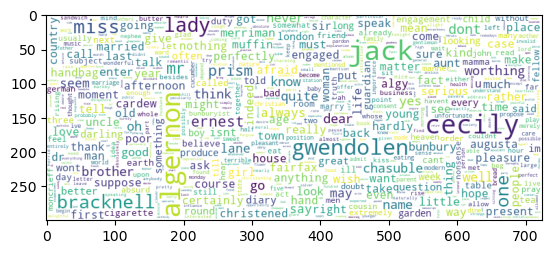

In [84]:
# create a wordcloud
def wordcloud_function(text: str,
                                output_filepath: str,
                                mask_path = None,
                                white_mask_background = True,
                                width = 725,
                                height = 300,
                                background_color = "white",
                                colormap = "viridis",
                                contour_color = "steelblue",
                                contour_width = 3,
                                collocations = False,
                                max_words = 2000,
                                max_font_size = 40,
                                min_font_size = 4,
                                prefer_horizontal = 0.9,
                                include_numbers = True):
    
    # start function timer
    
    start = time.time()
    
    # tokenize and lemmatize your text
    tokens = tokenize_text(text = text)
    lemmatized_tokens = lemmatize_tokens(tokens = tokens)
    
    # create a wordcloud object without a mask
    if mask_path == None:
    
        # create a WordCloud object
        wordcloud = WordCloud(width = width,
                              height = height,
                              background_color = background_color,
                              colormap = colormap,
                              collocations = collocations,
                              max_words = max_words,
                              max_font_size = max_font_size,
                              min_font_size = min_font_size,
                              prefer_horizontal = prefer_horizontal,
                              include_numbers = include_numbers)
    
    # create a wordcloud object with a mask image
    elif mask_path != None:
        
        # open the mask image as a numpy array
        mask = np.array(Image.open(mask_path))
        
        # if your mask has a black background update to white
        if white_mask_background == False:
            mask[mask[:, :] == 0] = 255
        
        # create a WordCloud object
        wordcloud = WordCloud(mask = mask,
                              width=mask.shape[1],
                              height=mask.shape[0],
                              background_color = background_color,
                              colormap = colormap,
                              contour_color = contour_color,
                              contour_width = contour_width,
                              collocations = collocations,
                              max_words = max_words,
                              max_font_size = max_font_size,
                              min_font_size = min_font_size,
                              prefer_horizontal = prefer_horizontal,
                              include_numbers = include_numbers)

    # generate a word cloud (must join the tokens into a string)
    wordcloud.generate(','.join(lemmatized_tokens))

    # end wordcloud timer
    end = time.time()
    print(f"wordcloud created in {round(end-start, 1)} seconds")
    
    # print, save, and return the wordcloud
    plt.imshow(wordcloud)
    if output_filepath!=sys.stdout:
       wordcloud.to_file(output_filepath)
       return wordcloud.to_image()

wordcloud_function(play,output_filepath=sys.stdout)